In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [24]:
df=pd.read_csv('ipl.csv')

In [25]:
print(df)

                                        full_scorecard  \
0    https://stats.espncricinfo.com/ci/engine/match...   
1    https://stats.espncricinfo.com/ci/engine/match...   
2    https://stats.espncricinfo.com/ci/engine/match...   
3    https://stats.espncricinfo.com/ci/engine/match...   
4    https://stats.espncricinfo.com/ci/engine/match...   
..                                                 ...   
953  https://stats.espncricinfo.com/ci/engine/match...   
954  https://stats.espncricinfo.com/ci/engine/match...   
955  https://stats.espncricinfo.com/ci/engine/match...   
956  https://stats.espncricinfo.com/ci/engine/match...   
957  https://stats.espncricinfo.com/ci/engine/match...   

                           team1                  team2  team1_score  \
0            Chennai Super Kings  Kolkata Knight Riders        131.0   
1                 Mumbai Indians         Delhi Capitals        177.0   
2    Royal Challengers Bangalore           Punjab Kings        205.0   
3           Luc

In [26]:
df.head()

,full_scorecard,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,https://stats.espncricinfo.com/ci/engine/match...,Chennai Super Kings,Kolkata Knight Riders,131.0,133.0,Kolkata Knight Riders,Field,KKR,6 wickets,Umesh Yadav,Wankhede Stadium,Mumbai
1,https://stats.espncricinfo.com/ci/engine/match...,Mumbai Indians,Delhi Capitals,177.0,179.0,Delhi Capitals,Field,Capitals,4 wickets,Kuldeep Yadav,Brabourne Stadium,Mumbai
2,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Punjab Kings,205.0,208.0,Punjab Kings,Field,Punjab,5 wickets,Odean Smith,Dr DY Patil Sports Academy,Mumbai
3,https://stats.espncricinfo.com/ci/engine/match...,Lucknow Super Giants,Gujarat Titans,158.0,161.0,Gujarat Titans,Field,Titans,5 wickets,Mohammed Shami,Wankhede Stadium,Mumbai
4,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Sunrisers Hyderabad,210.0,149.0,Sunrisers Hyderabad,Field,Royals,61 runs,Sanju Samson,Maharashtra Cricket Association Stadium,Pune


In [27]:
df.tail()

,full_scorecard,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
953,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Mumbai Indians,NaN,126.0,Mumbai Indians,Field,Mumbai,9 wickets,Dilhara Fernando,M Chinnaswamy Stadium,Bangalore
954,https://stats.espncricinfo.com/ci/engine/match...,Kings XI Punjab,Rajasthan Royals,221.0,180.0,Rajasthan Royals,Field,Kings,41 runs,Shaun Marsh,Punjab Cricket Association Stadium,Mohali
955,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Delhi Daredevils,192.0,87.0,Delhi Daredevils,Field,Royals,105 runs,Shane Watson,Wankhede Stadium,Mumbai
956,https://stats.espncricinfo.com/ci/engine/match...,Kings XI Punjab,Chennai Super Kings,112.0,116.0,Kings XI Punjab,Bat,Super,9 wickets,Makhaya Ntini,Wankhede Stadium,Mumbai
957,https://stats.espncricinfo.com/ci/engine/match...,Chennai Super Kings,Rajasthan Royals,163.0,164.0,Rajasthan Royals,Field,Royals,3 wickets,Yusuf Pathan,Dr DY Patil Sports Academy,Mumbai


In [28]:
df.describe()

,team1_score,team2_score
count,930.000000,948.000000
mean,163.149462,149.282700
std,29.695734,30.606165
min,67.000000,2.000000
25%,145.000000,132.000000
50%,164.000000,151.000000
75%,183.000000,170.000000
max,263.000000,226.000000


In [29]:
df.columns

Index(['full_scorecard', 'team1', 'team2', 'team1_score', 'team2_score',
       'toss_winner', 'toss_choice', 'winner', 'margin', 'man_of_the_match',
       'stadium', 'place'],
      dtype='object')

In [30]:
df.shape

(958, 12)

In [31]:
df.isnull()

,full_scorecard,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
953,False,False,False,True,False,False,False,False,False,False,False,False
954,False,False,False,False,False,False,False,False,False,False,False,False
955,False,False,False,False,False,False,False,False,False,False,False,False
956,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
df.isnull().sum()

full_scorecard       0
team1                0
team2                8
team1_score         28
team2_score         10
toss_winner          8
toss_choice          0
winner               0
margin               0
man_of_the_match     8
stadium              8
place               84
dtype: int64

In [33]:
df['winner'] = (df['team1_score'] > df['team2_score']).astype(int)

In [34]:
X = df[['team1', 'team2', 'toss_winner', 'toss_choice', 'stadium', 'place']]
y = df['winner']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
le = LabelEncoder()

In [40]:
le = LabelEncoder()

In [42]:
df['team1'] = le.fit_transform(df['team1'])
df['team2'] = le.fit_transform(df['team2'])

In [50]:
df['toss_winner'] = le.fit_transform(df['toss_winner'])
df['toss_choice'] = le.fit_transform(df['toss_choice'])
df['man_of_the_match'] = le.fit_transform(df['man_of_the_match'])
df['stadium'] = le.fit_transform(df['stadium'])
df['place'] = le.fit_transform(df['place'])

In [51]:
X = df[['team1', 'team2', 'toss_winner', 'toss_choice', 'stadium', 'place']]
y = df['winner']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
y_pred = model.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.53

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.69      0.62       158
           1       0.47      0.34      0.39       130

    accuracy                           0.53       288
   macro avg       0.52      0.51      0.51       288
weighted avg       0.52      0.53      0.52       288



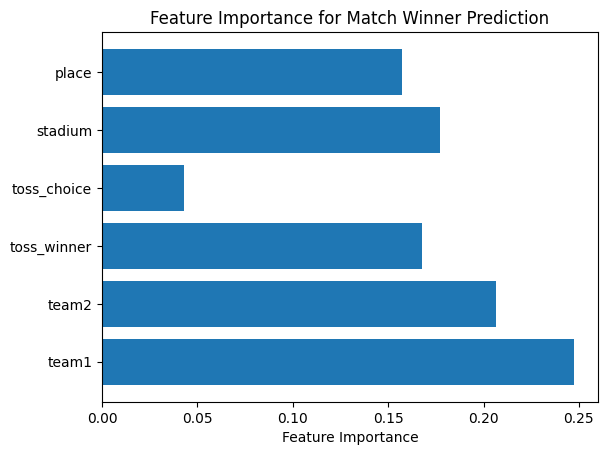

In [57]:
feature_importances = model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Match Winner Prediction')
plt.show()


In [58]:
new_match = np.array([[0, 1, 0, 1, 2, 3]])  # Adjust these values accordingly
new_match_scaled = scaler.transform(new_match)
predicted_winner = model.predict(new_match_scaled)
print('Predicted Winner: Team 1' if predicted_winner == 1 else 'Predicted Winner: Team 2')

Predicted Winner: Team 2


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
